In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # suppress warnings

In [16]:
#Importing and formatting the df
stocks = pd.read_csv('adjprice.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%Y%m%d')
stocks

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,2019-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,2019-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,2019-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


In [17]:
stocks.columns = stocks.columns.str.replace(' US Equity', '')
stocks

,Date,0111145D,0202445Q,0203524D,0226226D,0376152D,0440296D,0544749D,0574018D,0598884D,...,YNR,YRCW,YUM,YUMC,ZBH,ZETHQ,ZION,ZRN,ZTS,ZTS-W
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,2019-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,2019-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,2019-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


In [18]:
stocks.dropna(axis=1,inplace=True)
stocks

,Date,AA,AAPL,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,...,WY,X,XEL,XL,XLNX,XOM,XRAY,XRX,YRCW,ZION
0,1993-09-07,13.6285,0.8044,3.750,3.2659,2.3712,2.9608,6.8438,6.1024,5.3525,...,6.7803,20.5434,6.9696,12.3149,2.5342,8.0198,5.3036,20.5503,144439.5121,7.1675
1,1993-09-08,13.3718,0.8197,4.375,3.2037,2.4320,2.9025,6.8076,6.0868,5.2949,...,6.6519,20.3829,6.9696,12.2506,2.4735,8.0815,5.1244,20.5503,143691.1208,6.9766
2,1993-09-09,13.4652,0.7967,4.375,3.2659,2.3104,3.0046,6.7714,6.0711,5.3093,...,6.5878,20.4632,6.9326,12.2506,2.5797,8.0044,5.1244,20.3040,143691.1208,6.9554
3,1993-09-10,13.3952,0.8044,4.125,3.2659,2.3712,3.1067,6.8076,6.1495,5.4388,...,6.6947,20.7039,7.0065,12.2506,2.7087,8.0969,5.3036,20.4096,145187.9033,7.2099
4,1993-09-11,13.3952,0.8044,4.125,3.2659,2.3712,3.1067,6.8076,6.1495,5.4388,...,6.6947,20.7039,7.0065,12.2506,2.7087,8.0969,5.3036,20.4096,145187.9033,7.2099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,23.1300,207.7400,272.660,87.7500,311.2700,121.8000,40.5900,169.2700,167.9900,...,26.2100,15.1900,60.5100,57.5900,120.7700,74.8100,56.0200,34.4300,3.3500,45.1600
9455,2019-07-28,23.1300,207.7400,272.660,87.7500,311.2700,121.8000,40.5900,169.2700,167.9900,...,26.2100,15.1900,60.5100,57.5900,120.7700,74.8100,56.0200,34.4300,3.3500,45.1600
9456,2019-07-29,23.1200,209.6800,275.930,88.5500,307.2200,121.2100,40.9000,167.9100,162.7700,...,25.8400,15.2700,60.9800,57.5900,120.5500,75.3400,56.3700,33.9400,3.1800,44.6500
9457,2019-07-30,23.0400,208.7800,279.230,88.3100,303.6400,120.9600,40.9500,165.0000,160.2900,...,26.0900,15.7100,60.5900,57.5900,119.5100,75.3500,56.6700,32.7800,3.1800,45.4800


In [19]:
StartDate = "2008/01/01"
EndDate = "2018/12/31"

Drop the rows which are not in the period

In [20]:
stocks_short = stocks[(stocks["Date"] >= StartDate) & (stocks["Date"] <= EndDate)]
stocks_short.dropna(axis=1,inplace=True)
stocks_short

,Date,AA,AAPL,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,...,WY,X,XEL,XL,XLNX,XOM,XRAY,XRX,YRCW,ZION
5229,2008-01-01,71.7304,24.9913,15.54,20.1766,42.73,23.4705,35.7779,29.2546,49.76,...,19.5777,109.3278,14.7221,37.7745,16.6742,68.1067,42.2717,32.8849,128175.0128,41.8763
5230,2008-01-02,70.9062,24.5825,15.25,20.0544,41.71,22.4857,34.8763,28.3940,48.24,...,18.9883,102.7543,14.4612,37.6543,16.1024,67.9759,41.0510,32.1334,115725.0116,40.6207
5231,2008-01-03,71.0239,24.5939,15.02,19.9322,41.79,22.1451,35.2385,28.1838,47.84,...,19.1688,101.6421,14.5460,38.0673,16.0186,68.2085,41.4360,31.8896,103650.0104,39.8045
5232,2008-01-04,68.4334,22.7165,14.48,20.0472,40.36,21.5676,35.3309,26.9355,45.70,...,18.2184,95.8913,14.3829,37.4591,15.5230,66.9363,40.6379,30.6912,94650.0095,38.0286
5233,2008-01-05,68.4334,22.7165,14.48,20.0472,40.36,21.5676,35.3309,26.9355,45.70,...,18.2184,95.8913,14.3829,37.4591,15.5230,66.9363,40.6379,30.6912,94650.0095,38.0286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9242,2018-12-27,27.1600,154.8867,315.67,69.7562,225.14,84.4574,40.2712,128.4410,127.41,...,20.9373,18.2614,48.9103,57.5900,83.7499,67.4103,36.9977,19.1405,3.0300,39.9569
9243,2018-12-28,26.6000,154.9660,318.17,70.2105,223.13,84.5564,40.0942,127.9460,127.23,...,21.2291,18.1519,48.5652,57.5900,83.7897,66.6574,36.9778,19.3573,3.2200,39.9273
9244,2018-12-29,26.6000,154.9660,318.17,70.2105,223.13,84.5564,40.0942,127.9460,127.23,...,21.2291,18.1519,48.5652,57.5900,83.7897,66.6574,36.9778,19.3573,3.2200,39.9273
9245,2018-12-30,26.6000,154.9660,318.17,70.2105,223.13,84.5564,40.0942,127.9460,127.23,...,21.2291,18.1519,48.5652,57.5900,83.7897,66.6574,36.9778,19.3573,3.2200,39.9273


Store the columns names and:

calculate the return as (FinalPrice-StartPrice)/StartPrice.
calculate the volatility as StandardDeviation/StartPrice.
The Sharpe Ratio (should have some no risk return to compare this against) then gives an indication of the performance of the stock over the period of interest.

In [21]:
stocks = stocks_short.columns[1:] # column 0 has the date, so drop that

stocks_return = stocks_short.iloc[-1,1:]/stocks_short.iloc[0,1:]-1 # last/first-1

# calcuate standard variation of time series and divide by first price
stocks_var = stocks_short.iloc[:,1:].std()/stocks_short.iloc[0,1:] 
sharpe_ratio = stocks_return/stocks_var # return divided by variance

Plot Volatility vs Return and a reference line to give an indication of the best performing stocks. Best performing stocks are in contact with line through the origin with largest slope.

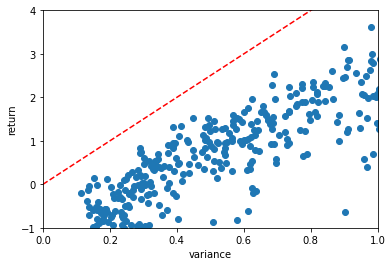

In [22]:
plt.scatter(stocks_var,stocks_return)
plt.plot([0,1],[0,5],ls='--', color = "red") # reference line of return = 5*std
plt.xlabel('variance')
plt.ylabel('return')
plt.xlim([.0,1])
plt.ylim([-1,4]);

Plot histograms of the Return, Volatility and Sharpe Ratio. The majority of stocks have a Sharpe Ratio > 2, which is indicative of good performance.

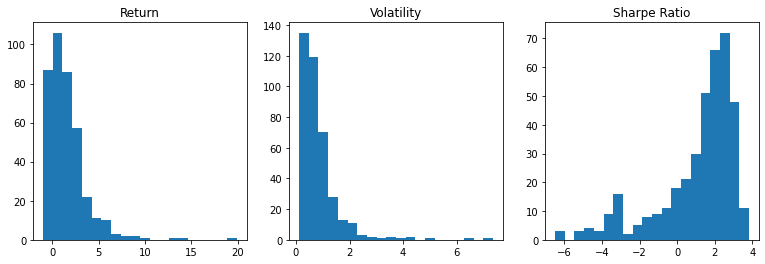

In [23]:
f, axs = plt.subplots(1, 3, figsize=(13,4))
axs[0].hist(stocks_return,20); # but the data in 20 bins
axs[0].set_title('Return')
axs[1].hist(stocks_var,20);
axs[1].set_title('Volatility')
axs[2].hist(sharpe_ratio,20);
axs[2].set_title('Sharpe Ratio');

In [24]:
sharpe_ratio_sorted = pd.Series.sort_values(sharpe_ratio,ascending=False)
sharpe_ratio_sorted.head(20)

XLNX    3.821706
IAC     3.711319
MKC     3.699921
ABT     3.688422
CHD     3.650639
MCD     3.498661
AJG     3.424499
WMT     3.391622
CA      3.375204
LLY     3.339099
INTU    3.327223
PX      3.278131
ORLY    3.227559
ROST     3.16784
CSX     3.164823
BLL     3.162248
ABMD    3.160713
WM      3.134832
PFE     3.131582
NSC     3.127883
dtype: object

# MODELLING

In [25]:
SR = sharpe_ratio_sorted.to_frame()
SR = SR.rename(columns={0:"Sharpe Ratio"})
SR = SR.sort_index()

In [26]:
stocks_return = stocks_short.iloc[-1,1:]/stocks_short.iloc[0,1:]-1 # last/first-1
stocks_return = stocks_return.to_frame()

In [27]:
GICS = pd.read_csv('table-1.csv')
GICS = GICS.set_index('Symbol')
GICS

,Name,GICS Sector,GICS Sub-Industry
Symbol,,,
A,Agilent Technologies,Health Care,Health Care Equipment
AAL,American Airlines Group,Industrials,Airlines
AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals"
ABBV,AbbVie,Health Care,Pharmaceuticals
...,...,...,...
YUM,Yum! Brands,Consumer Discretionary,Restaurants
ZBH,Zimmer Biomet,Health Care,Health Care Equipment
ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments


In [28]:
sectors = pd.merge(GICS, SR, left_index=True, right_index=True)
sectors.reset_index(inplace=True)
sectors = sectors.rename(columns = {"index":"Symbol"})

In [29]:
sectors.groupby('GICS Sector').count()


,Symbol,Name,GICS Sub-Industry,Sharpe Ratio
GICS Sector,,,,
Communication Services,7,7,7,7
Consumer Discretionary,26,26,26,26
Consumer Staples,26,26,26,26
Energy,13,13,13,13
Financials,36,36,36,36
Health Care,30,30,30,30
Industrials,38,38,38,38
Information Technology,30,30,30,30
Materials,13,13,13,13


In [30]:
SR.reset_index(inplace=True)
SR = SR.rename(columns={'index':"Symbol"})

In [31]:
chosen_stocks = sectors.groupby(['GICS Sector']).max()
chosen_stocks = chosen_stocks[['Sharpe Ratio']]
chosen_stocks.reset_index(inplace=True)
chosen_stocks = chosen_stocks.merge(SR, how='inner')
chosen_stocks

,GICS Sector,Sharpe Ratio,Symbol
0,Communication Services,2.713973,VZ
1,Consumer Discretionary,3.498661,MCD
2,Consumer Staples,3.699921,MKC
3,Energy,2.437101,OKE
4,Financials,3.424499,AJG
5,Health Care,3.688422,ABT
6,Industrials,3.164823,CSX
7,Information Technology,3.327223,INTU
8,Materials,2.840398,SHW
9,Real Estate,2.919582,UDR


In [32]:
new_portfolio = stocks_short[['Date','VZ', 'MCD', 'MKC', 'OKE', 'AJG', 'ABT', 'CSX', 'INTU', 'SHW', 'UDR', 'WEC']]
new_portfolio

,Date,VZ,MCD,MKC,OKE,AJG,ABT,CSX,INTU,SHW,UDR,WEC
5229,2008-01-01,23.5520,42.304,29.8817,12.0834,15.9818,20.1766,11.7248,29.237,49.270,11.5326,17.0420
5230,2008-01-02,23.2932,41.722,29.2433,12.0699,15.6713,20.0544,11.5835,28.793,48.005,11.6082,16.7236
5231,2008-01-03,23.4010,41.600,29.2117,12.1401,15.4599,19.9322,11.1969,28.645,47.980,11.3467,16.5382
5232,2008-01-04,22.9644,40.968,28.8886,11.9646,15.3542,20.0472,10.8583,27.868,45.908,11.2363,16.6151
5233,2008-01-05,22.9644,40.968,28.8886,11.9646,15.3542,20.0472,10.8583,27.868,45.908,11.2363,16.6151
...,...,...,...,...,...,...,...,...,...,...,...,...
9242,2018-12-27,53.4624,173.582,138.4592,51.9360,71.5516,69.7562,61.6545,196.090,389.142,38.6162,68.1248
9243,2018-12-28,53.5787,173.434,138.0025,51.6048,71.7793,70.2105,61.6744,194.708,387.560,38.4696,67.9574
9244,2018-12-29,53.5787,173.434,138.0025,51.6048,71.7793,70.2105,61.6744,194.708,387.560,38.4696,67.9574
9245,2018-12-30,53.5787,173.434,138.0025,51.6048,71.7793,70.2105,61.6744,194.708,387.560,38.4696,67.9574


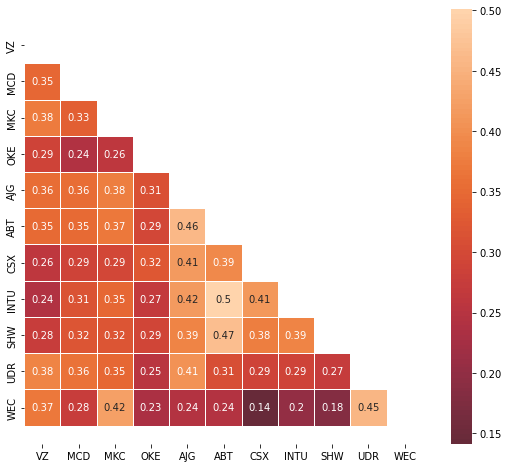

In [33]:
# diff calculates the daily return, then we calculate the correlation between variables
corrs = new_portfolio.diff(axis=0, periods=1).corr() 
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) # create a mask to only show entries below the main diagonal
f, ax = plt.subplots(figsize=(10, 8))
# plot the heatmap with a colour bar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# adjust the top and bottom, so that we can see the whole figure
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

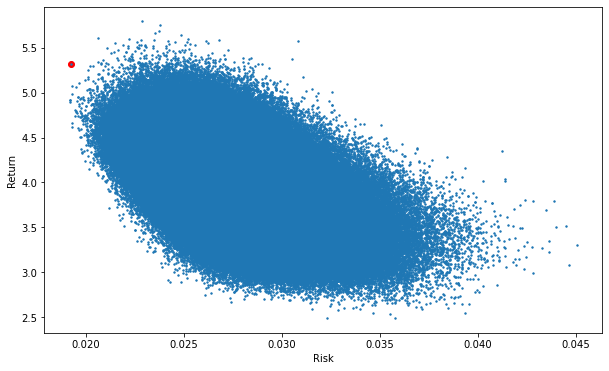

In [34]:
NSAMP = 1000000 # set the number of random samples of the weights
result_array = np.zeros((2, NSAMP)) # create a numpy array to store the returns and risk for each sample
Ro = new_portfolio.iloc[0,1:] # store the initial stock prices
R = new_portfolio.iloc[-1,1:] # store the final stock prices
max_returnrisk = 0
for i in range(NSAMP): # loop over all the samples
    weight = np.random.rand(11)# generates weights in the range [0,1] for all the stocks
    # calculate the initial value of the stock portfolio, @ => multiply two matrices, .T => transpose of matrix
    Po = weight.T @ Ro
    w = weight/Po # normalize random numbers so that portfolio has an initial value of 1
    Pf = w.T @ R # calculate final value of portfolio
    risk = np.sqrt(w.T @ corrs @ w) # use the formula above to calculate the risk
    result_array[:,i] = [risk,Pf-1] # store risk and return
    if (Pf-1)/risk >= max_returnrisk:
        max_returnrisk = (Pf-1)/risk
        weights = weight / weight.sum()
        bestrisk = risk
        max_return = Pf-1
# plot risk vs returns and add axis labels
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(bestrisk,max_return,color='r')
plt.scatter(result_array[0,:],result_array[1,:], s=2) 
plt.xlabel('Risk')
plt.ylabel('Return');

In [35]:
weights = pd.DataFrame(weights*100)

returns = ((R-Ro)/Ro).to_frame()
returns = returns.reset_index()

stock_weights = pd.merge(returns, weights, left_index=True, right_index=True)
stock_weights = stock_weights.set_index(['index'])
stock_weights.columns = ['return (%)', 'weight (%)']
stock_weights = stock_weights['weight (%)']

In [36]:
stock_weights

index
VZ       0.205767
MCD     26.410742
MKC      3.385426
OKE      0.388859
AJG      0.257359
ABT      0.335553
CSX     16.655703
INTU     6.381929
SHW     38.341731
UDR      0.582958
WEC      7.053973
Name: weight (%), dtype: float64

In [37]:
stock_weights_pd = pd.DataFrame(stock_weights)
stock_weights_pd

,weight (%)
index,
VZ,0.205767
MCD,26.410742
MKC,3.385426
OKE,0.388859
AJG,0.257359
ABT,0.335553
CSX,16.655703
INTU,6.381929
SHW,38.341731


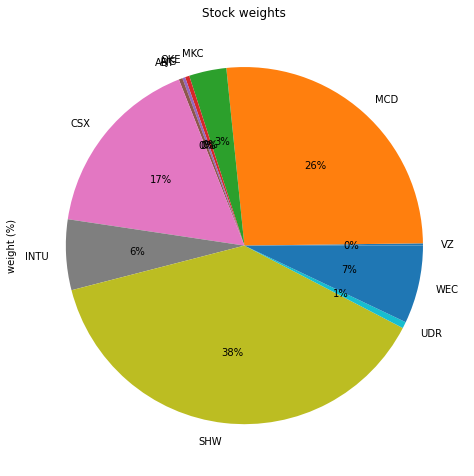

In [38]:
plt.rcParams["figure.figsize"] = (8,20)

stock_weights_pd['weight (%)'].plot(kind='pie', autopct='%1.0f%%',
                                title='Stock weights');

# Absolute weight

In [39]:
stock_names = new_portfolio.columns[1:]

In [40]:
stocks = pd.read_csv('adjprice.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%Y%m%d')
stocks.columns = stocks.columns.str.replace(' US Equity', '')
StartDate = "2019/01/01"
EndDate = "2019/12/31"
portfolio2018=stocks[(stocks["Date"] >= StartDate) & (stocks["Date"] <= EndDate)]
portfolio2018 = portfolio2018[['Date','VZ', 'MCD', 'MKC', 'OKE', 'AJG', 'ABT', 'CSX', 'INTU', 'SHW', 'UDR', 'WEC']]


In [41]:
portfolio2018

,Date,VZ,MCD,MKC,OKE,AJG,ABT,CSX,INTU,SHW,UDR,WEC
9247,2019-01-01,54.4997,175.419,138.2309,52.5496,72.9472,71.4352,61.7241,195.702,391.420,38.7139,68.2036
9248,2019-01-02,54.3058,173.928,134.6371,52.9977,71.1557,68.6402,61.5453,193.336,390.196,37.5120,66.5492
9249,2019-01-03,54.4997,172.782,135.2725,52.8711,69.8195,65.4008,60.5816,187.421,378.418,37.6977,66.7265
9250,2019-01-04,54.6354,176.121,135.6795,55.1796,71.5813,67.2674,62.3798,194.857,388.445,37.6390,67.2189
9251,2019-01-05,54.6354,176.121,135.6795,55.1796,71.5813,67.2674,62.3798,194.857,388.445,37.6390,67.2189
...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,57.0800,215.580,162.5700,68.4900,92.3300,87.7500,68.9600,283.770,512.300,46.0900,86.6600
9455,2019-07-28,57.0800,215.580,162.5700,68.4900,92.3300,87.7500,68.9600,283.770,512.300,46.0900,86.6600
9456,2019-07-29,57.3700,214.980,162.4800,66.8000,92.0000,88.5500,69.6200,281.350,510.140,46.5600,87.5000
9457,2019-07-30,56.6300,212.340,161.3500,67.2100,91.8100,88.3100,70.2100,279.620,515.020,46.6000,86.6600


In [42]:
portfolio2018 = portfolio2018.melt(id_vars = 'Date')
portfolio2018

,Date,variable,value
0,2019-01-01,VZ,54.4997
1,2019-01-02,VZ,54.3058
2,2019-01-03,VZ,54.4997
3,2019-01-04,VZ,54.6354
4,2019-01-05,VZ,54.6354
...,...,...,...
2327,2019-07-27,WEC,86.6600
2328,2019-07-28,WEC,86.6600
2329,2019-07-29,WEC,87.5000
2330,2019-07-30,WEC,86.6600


In [43]:
start =pd.DataFrame( portfolio2018.groupby(['variable']).first()['value'])
end = pd.DataFrame( portfolio2018.groupby(['variable']).last()['value'])
stockname= list(start.index)
new_data= pd.DataFrame({'stock':stockname, 'start_price': list(start['value']),'end_price':list(end['value'])})
new_data['increasing_rate']= (new_data['end_price']-new_data['start_price'])/new_data['start_price']

In [44]:
new_data

,stock,start_price,end_price,increasing_rate
0,ABT,71.4352,88.31,0.236225
1,AJG,72.9472,91.81,0.258582
2,CSX,61.7241,70.21,0.137481
3,INTU,195.7020,279.62,0.428805
4,MCD,175.4190,212.34,0.210473
5,MKC,138.2309,161.35,0.167250
6,OKE,52.5496,67.21,0.278982
7,SHW,391.4200,515.02,0.315773
8,UDR,38.7139,46.60,0.203702
9,VZ,54.4997,56.63,0.039088


In [45]:
stock_weights=stock_weights/100

In [46]:
stock_weights

index
VZ      0.002058
MCD     0.264107
MKC     0.033854
OKE     0.003889
AJG     0.002574
ABT     0.003356
CSX     0.166557
INTU    0.063819
SHW     0.383417
UDR     0.005830
WEC     0.070540
Name: weight (%), dtype: float64

In [47]:
# weight=[]
# for i in range(len(stock_weights)):
#     n=round(stock_weights[i])
#     weight.append(n)

In [48]:
# weight

In [63]:
money =10000
static_weight = [money*stock_weights[i]//new_data.loc[i,'start_price'] for i in range(len(stock_weights)) ]

In [64]:
for i in range(len(stock_weights)):
    print('Stock Name: ', new_data.loc[i,'stock'],end=' ')
    print('Buying Number: ', static_weight[i])

Stock Name:  ABT Buying Number:  0.0
Stock Name:  AJG Buying Number:  36.0
Stock Name:  CSX Buying Number:  5.0
Stock Name:  INTU Buying Number:  0.0
Stock Name:  MCD Buying Number:  0.0
Stock Name:  MKC Buying Number:  0.0
Stock Name:  OKE Buying Number:  31.0
Stock Name:  SHW Buying Number:  1.0
Stock Name:  UDR Buying Number:  99.0
Stock Name:  VZ Buying Number:  1.0
Stock Name:  WEC Buying Number:  10.0


In [65]:
moneyinput=[static_weight[i]*new_data.loc[i,'start_price']for i in range(len(stock_weights)) ]
put=0
for i in range(len(moneyinput)):
    put+=moneyinput[i]

In [66]:
put

9524.3891

In [67]:
money=[]
for i in range(len(static_weight)):
    a=new_data.loc[i,'end_price']*static_weight[i]
    money.append(a)

In [68]:
outcome=0
for i in range(len(money)):
    outcome+=money[i]

In [69]:
outcome

11791.369999999999

In [70]:
earn=outcome-put
earn

2266.9808999999987